#  Plotting BOX-FIT light curves 
[NOTE: BOXFIT compiled WITHOUT boosted frames] 

Link to BOXFIT (GitHub): https://github.com/hveerten/boxfit 

I.J. Rodriguez 

Created: 2019.03.22

Last update: 2019.03.28
    - 2019.03.28
        - updated documentation
    - 2019.03.27
        - achieved modified lightcurve plots (Fig. 2)
            - ES: for loop --> for i, n in enumerate(xrange(start, finish, increment))
                - enumerate allows for iterating over keys (i) and values (n) 
                - xrange works for Python 2 only
        - working on adding captions to plots 
    - 2019.03.22
        - goal: read all text files from structured jet runs (all 4 runs), plot
            - ES: "for files in glob.glob('./{}/*.txt'.format(dirs)):"
                - grabs all .txt files in the Boxfit directory 
            - ES/SciPy: os.walk()
        - to do: determine which plot is which! 

In [131]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib.pyplot import cm
import time 
import os, re 
import glob
os.chdir('/Users/Isabel/Documents/Boxfit')
#import sys
#sys.path.append('home/rodrjack/Downloads/boxfitv2/data/lightcurve_test_plots/20190211')
#print os.getcwd();
from numpy import loadtxt

In [129]:
'''Identifying subdirectories'''

dirs = []
for dirpath, dirnames, filenames in os.walk('.'):
    dirs.append(dirnames)
directories = dirs[0][1:]

#directories

In [130]:
'''Identifying & reading datafiles (.txt) in subdirectories'''

for dirs in directories:
    for files in glob.glob('./{}/*.txt'.format(dirs)):
        with open(files) as data:
            d = data.read()
            #print(d)

In [128]:
no_files = 13 # number of files

directory = os.getcwd()

def data_extraction(directory): 
    
    comma_list = [] #list with comma-delimited lines
    for dirs in dirss:
        for files in glob.glob('./{}/*.txt'.format(dirs)):
            with open(files) as data:
                f = open(files)
            for line in f: 
                inner_list = [elt.strip() for elt in line.split(',')]
                comma_list.append(inner_list) #comma-delimited
    return comma_list 

comma_list = data_extraction(directory)

#print(comma_list)

**BOXFIT compiled WITHOUT boosted frames** 

- Not storing intermediate dF/dt_e

Radiation switches: 
- synchrotron self-absorption ENABLED 
- synchrotron self-absorption computed globally for each ray 
- electron cooling ENABLED 
- box data included 
- Blandford-McKee analytical data included (Blandford & McKee, 1976, Physics of Fluids)
- Calculating both forward and receeding jets 

### Fit parameter values 

- In case the case of a a single lightcurve/spectrum calculation, these parameters set values for that calculation.


- In the case of a data fit, parameters serve as lower bound values for initial simplex (unless simplex from disk is used and start_from_simplex is 1).


- In the case of Monte Carlo data fit error estimation, parameters provide best fit results (be sure to update them correctly when calculating error on these parameters once a best fit is found). 

### Model parameter settings

- $\theta_0$ = 0.05 [rad] 
- $n_0$ = 1 [$cm^{-3}$] (circumbust number density at reference dist $10^{17}$ cm)
- $p$ = 2.5 (syncrotron slope)
- $\epsilon_B$ = $1 \cdot 10^{-2}$ (fraction of downstream internal energy in shock-gen B-field)
- $\epsilon_E$ = $1 \cdot 10^{-1}$ (fraction of downstream internal energy in shock-accel e-) 
- $\chi_N$ = 1 (fraction of electrons being accelerated)
- eds_phi_res = 1 (on-axis) , = 5 (off-axis) 

### Time and frequency settings

- $\nu_0$ = $1 \cdot 10^{17}$ [Hz]
- $t_0$ = $1 \cdot 10^{3}$ [s]
- $t_1$ = $1 \cdot 10^{9}$ [s]

### Observer distance settings
- $L_{dist}$ = $8 \cdot 10^{27}$ [cm] (luminostiy distance) 
- $z$ = 0.5 (redshift)

### Simulation parameters

- $\theta_0$ [rad] (jet half-opening angle), converted to degrees for plotting
- $\theta_{obs}$ [rad] (observer angle), converted to degrees for plotting
- $E_{iso}$ [erg] (isotropic equivalent energy) 

In [127]:
theta_0 = [10, 10, 20]  
E_iso = [1e53, 1e52, 1e52] 
theta_obs = [5, 10, 15, 20]  
#E_jet = E_iso * (theta_0 ** 2 / 2.)

In [98]:
"Variables for plotting"
'''Header looks like the following:'''
'''['i', 't (s)', 'nu (Hz)', 'F (mJy)']'''
'''Need to extract the last element, and turn it into a float'''
'''(Replacing i with ts, this is a time index)'''
def Flux_density(comma_list, no_files):
 
    ts = [] #timestep, [0] 
    t = [] #time, [1]
    F = np.ones((197, no_files))  # [mJy], [3]
    
    lightcurve_data_1 = comma_list[97:197] 
    lightcurve_data_2 = comma_list[294:394]
    lightcurve_data_3 = comma_list[491:591]
    lightcurve_data_4 = comma_list[688:788]
    lightcurve_data_5 = comma_list[885:985]
    lightcurve_data_6 = comma_list[1082:1182]
    lightcurve_data_7 = comma_list[1279:1379]
    lightcurve_data_8 = comma_list[1476:1576]
    lightcurve_data_9 = comma_list[1673:1773]
    lightcurve_data_10 = comma_list[1870:1970]
    lightcurve_data_11 = comma_list[2067:2167]
    lightcurve_data_12 = comma_list[2264:2364]
    lightcurve_data_13 = comma_list[2461:2561]

    
    F1 = [lightcurve_data_1[:][i][3] for i in range(100)]    
    F2 = [lightcurve_data_2[:][i][3] for i in range(100)]    
    F3 = [lightcurve_data_3[:][i][3] for i in range(100)]    
    F4 = [lightcurve_data_4[:][i][3] for i in range(100)]    
    F5 = [lightcurve_data_5[:][i][3] for i in range(100)]    
    F6 = [lightcurve_data_6[:][i][3] for i in range(100)]    
    F7 = [lightcurve_data_7[:][i][3] for i in range(100)]    
    F8 = [lightcurve_data_8[:][i][3] for i in range(100)]    
    F9 = [lightcurve_data_9[:][i][3] for i in range(100)]    
    F10 = [lightcurve_data_10[:][i][3] for i in range(100)]    
    F11 = [lightcurve_data_11[:][i][3] for i in range(100)]    
    F12 = [lightcurve_data_12[:][i][3] for i in range(100)]    
    F13 = [lightcurve_data_12[:][i][3] for i in range(100)]    
    
    F = zip(F1, F2, F3, F4, F5, F6, F7, F8, F9, F10, F11, F12, F13)
    F = np.asarray(F, dtype = float)
    F = np.reshape(F, (100, no_files))
    
    line = 97 # dataset found on lines 97-196, use for time 
    while line < 197:
        ts_data = comma_list[line][0] 
        t_data = comma_list[line][1]
        ts.append(ts_data)
        t.append(t_data)
        line += 1
    
    t = np.asarray(t, dtype = float)
    ts = np.asarray(ts, dtype = int)
    #F = np.asarray(F, dtype = float)
    return F, t, ts 

F, t, ts = Flux_density(comma_list, no_files)

In [10]:
#"Saving to .txt file"

#np.savetxt("20190211_lightcurve_theta_obs_var.txt", np.column_stack((ts, t, F)), delimiter = '\t',header = "time index, t [s], Flux [mJy]", comments='' )
#np.savetxt("20190211_lightcurve_comments.txt", np.column_stack((z, eds_phi_res_ON, eds_phi_res_OFF)), delimiter = '\t',header = "redshift, phi_res (on-axis), phi_res (off-axis)", comments='' )

## Lightcurve plots

- Fig.1 : Lightcurve plotted for $\theta_{obs}$ = 5$^{\circ}$
- Fig.2 : Lightcurves plotted for varying $\theta_{obs}$
- Fig.3 : Lightcurve plotted on-axis for $\theta_0$ = 10$^{\circ}$ (forward jet only)

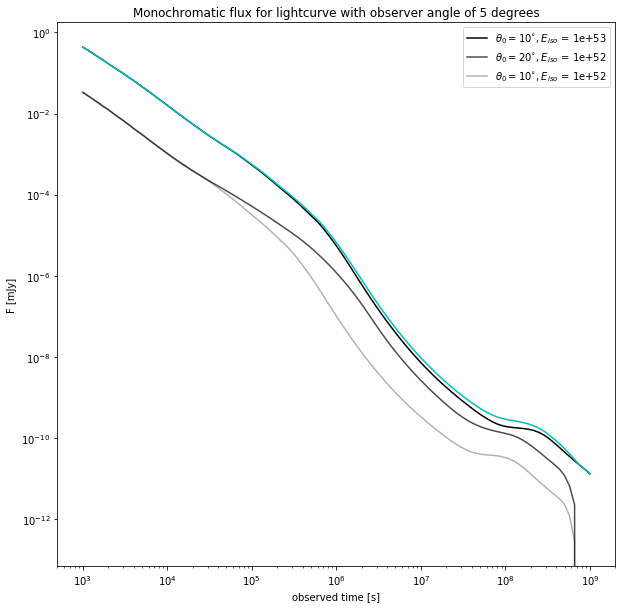

In [123]:
def theta_obs_5deg(t, F):
    fig1 = plt.figure(figsize=(10,10))
    
    for n in range(2): 
        plt.plot(t, F[:,n+1], 'k' ,alpha =  1 - n * 0.3, label= r'$\theta_{0} = %s ^{\circ}, E_{iso}$ = %s' % (theta_0[n+1], E_iso[n]))
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('observed time [s]')
        plt.ylabel('F [mJy]')
        plt.title('Monochromatic flux for lightcurve with observer angle of 5 degrees')
    
    plt.plot(t, F[:,0], 'k' ,alpha = 0.3, label = r'$\theta_{0} = %s ^{\circ}, E_{iso}$ = %s' % (theta_0[0], E_iso[2])) # , label='theta_obs = %s' % theta_obs[0]
    plt.plot(t, F[:,1] + F[:,2] - F[:,0], 'c')
    plt.legend()
    plt.show()
    return fig1

fig1 = theta_obs_5deg(t,F)

Figure 1: Three lightcurves (black and grey curves) were calculated for different opening angles and isotropic equivalent energies. The lightcurve in cyan is the result of adding the black and dark grey curves and subtracting the light grey curve. 

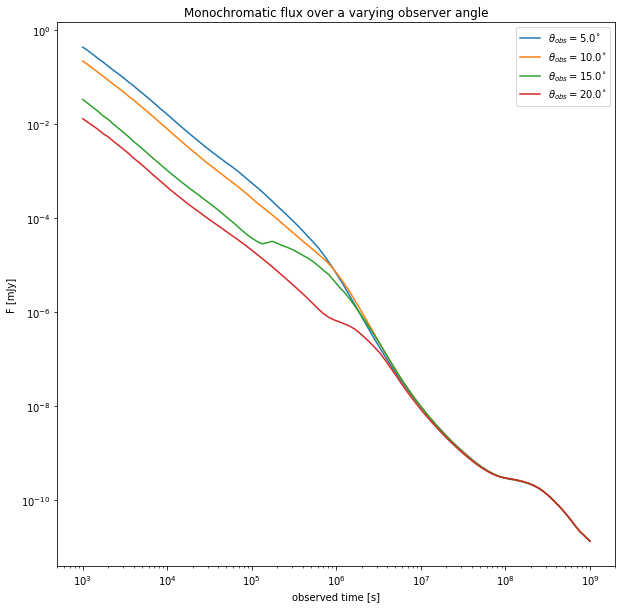

In [99]:
def curves(t, F):
    fig2 = plt.figure(figsize=(10,10))

    for i, n in enumerate(xrange(0,11,3)): 
        plt.plot(t, F[:,n+1] + F[:,n+2] - F[:,n], label = r'$\theta_{obs} = %s ^{\circ}$' % float(theta_obs[i]))
        plt.xscale('log')
        plt.yscale('log')
        plt.xlabel('observed time [s]')
        plt.ylabel('F [mJy]')
        #plt.xlim([1.8e4,.5e6])
        #plt.ylim([1e-5, .5e-1])
        plt.title('Monochromatic flux over a varying observer angle')
        plt.legend()

    plt.show()
    return fig2

fig2 = curves(t,F)

Figure 2: Using the process described in Fig.1 for a range of observer angles. Fluxes are divergent until ~10E6 s, with a factor of ~2 difference in magnitude of flux between the smallest and largest $\theta_{obs}$. All curves feature a late-time rebrightening starting at ~10E8 s. The curve corresponding to $\theta_{obs}$ = 15$^{\circ}$, plotted in green, exhibits a similar type of rebrightening feature between ~10E5 and 10E6 s.  

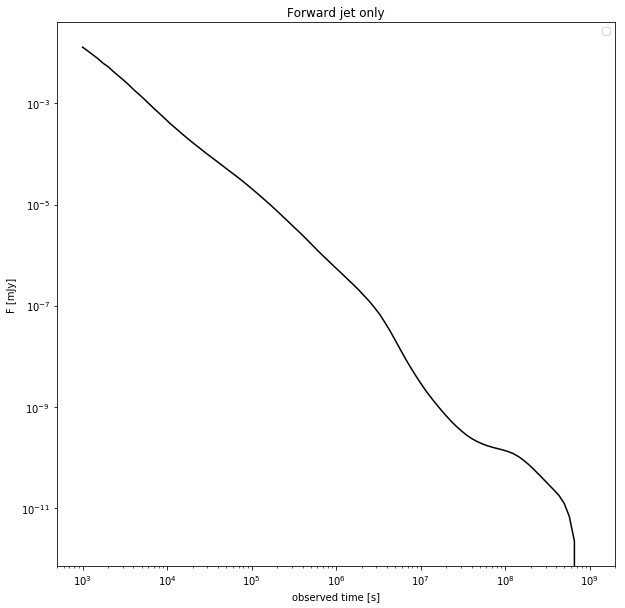

In [106]:
def forward_jet(t, F):
    fig3 = plt.figure(figsize=(10,10))

    plt.plot(t, F[:,12], 'k')
    plt.xscale('log')
    plt.yscale('log')
    plt.xlabel('observed time [s]')
    plt.ylabel('F [mJy]')
            #plt.xlim([1.8e4,.5e6])
            #plt.ylim([1e-5, .5e-1])
    plt.title('Forward jet only')
    plt.legend()
    #plt.plot(t, F[:,0], 'k')
    plt.show()
    return fig3

fig3 = forward_jet(t,F)

Figure 3: Lightcurve calcuated on-axis for forward jet only with an opening half angle of ten degrees. As only the forward jet was calculated, the late-time rebrightening feature cannot be attributed to the rise of the counter-jet. 